In [ ]:

import cv2
import numpy as np
from tqdm import tqdm
from statistics import mean
from joblib import dump, load
from tensorflow import keras
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from tensorflow.keras import datasets, layers, models
#Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0


# Class labels for reference
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


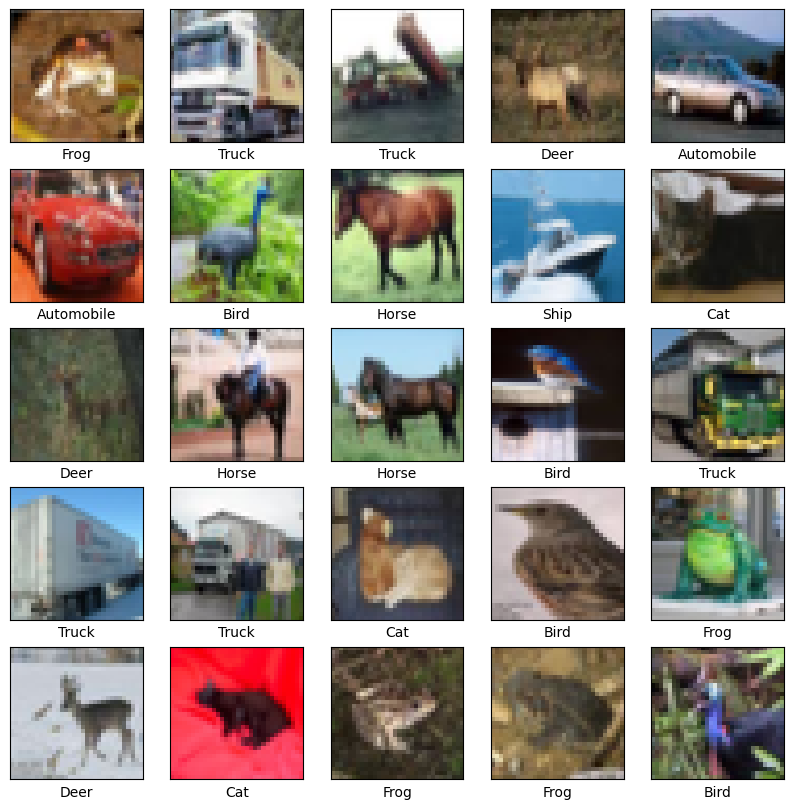

In [ ]:
# Visualize the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
def preprocess(xs):
    hog_imgs = []
    for x in tqdm(xs):
        # Assurez-vous que l'image est au format uint8
        if x.dtype != np.uint8:
            x = (x * 255).astype(np.uint8)

        # Convertir l'image en niveaux de gris
        gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)

        # Calculer les descripteurs HOG
        fd = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_imgs.append(fd)
    return np.array(hog_imgs)

In [ ]:
X_train_hog = preprocess(X_train)
X_test_hog = preprocess(X_test)

100%|██████████| 10000/10000 [00:06<00:00, 1452.32it/s]


In [ ]:
print(X_train_hog.shape)
print(X_test_hog.shape)

(50000, 324)
(10000, 324)


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Normalisation des données
    ('pca', PCA(n_components=100)), # Réduction de la dimensionnalité (par exemple, réduire à 100 dimensions)
    ('svm', SVC(kernel='linear', C=1.0))  # Classificateur SVM
])


In [ ]:
pipeline.fit(X_train_hog, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('svm', SVC(kernel='linear'))])

In [ ]:
y_pred = pipeline.predict(X_test_hog)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 50.33%


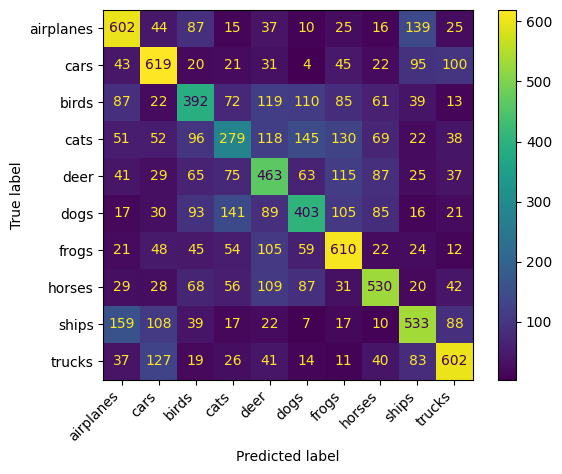

In [ ]:

color = 'white'
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),   # Normalisation des données
    ('pca', PCA(n_components=100)), # Réduction de la dimensionnalité (par exemple, réduire à 100 dimensions)
    ('svm', SVC(kernel='rbf', C=10, gamma=0.01))  # Classificateur SVM
])
pipeline1.fit(X_train_hog, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('svm', SVC(C=10, gamma=0.01))])

In [ ]:
y_pred1 = pipeline1.predict(X_test_hog)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy1 * 100:.2f}%')

Accuracy: 62.62%


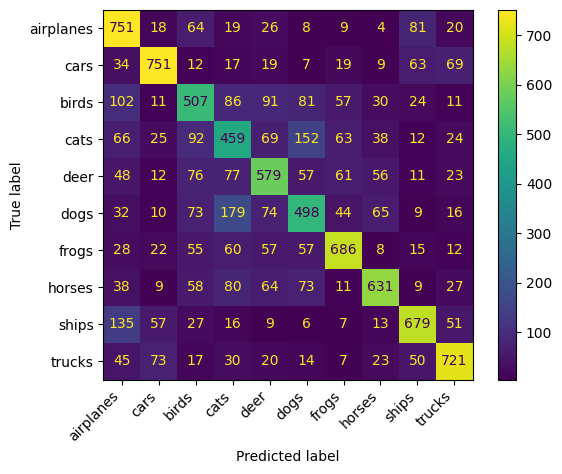

In [ ]:
color = 'white'
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("\nRapport de classification :")
report=classification_report(y_test, y_pred1, target_names=class_names, output_dict=True)
print(report)



Rapport de classification :
{'Airplane': {'precision': 0.5871774824081314, 'recall': 0.751, 'f1-score': 0.6590609916630101, 'support': 1000.0}, 'Automobile': {'precision': 0.7601214574898786, 'recall': 0.751, 'f1-score': 0.755533199195171, 'support': 1000.0}, 'Bird': {'precision': 0.5168195718654435, 'recall': 0.507, 'f1-score': 0.5118626956082787, 'support': 1000.0}, 'Cat': {'precision': 0.44868035190615835, 'recall': 0.459, 'f1-score': 0.453781512605042, 'support': 1000.0}, 'Deer': {'precision': 0.5744047619047619, 'recall': 0.579, 'f1-score': 0.5766932270916335, 'support': 1000.0}, 'Dog': {'precision': 0.5225603357817419, 'recall': 0.498, 'f1-score': 0.5099846390168971, 'support': 1000.0}, 'Frog': {'precision': 0.7116182572614108, 'recall': 0.686, 'f1-score': 0.6985743380855397, 'support': 1000.0}, 'Horse': {'precision': 0.7194982896237172, 'recall': 0.631, 'f1-score': 0.6723494938732019, 'support': 1000.0}, 'Ship': {'precision': 0.7124868835257083, 'recall': 0.679, 'f1-score': 0.6

In [ ]:
import mlflow

In [56]:
mlflow.set_experiment("ML_project_SVM")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
with mlflow.start_run():
    mlflow.log_param("kernel", "rbf")
    mlflow.log_param("C", 10)
    mlflow.log_param("gamma", 0.01)
    mlflow.log_metric({
        "accuracy": accuracy1,
        "recall_class_Airplane": report['Airplane']['recall'],
        "recall_class_Automobile": report['Automobile']['recall'],
        "recall_class_Bird": report['Bird']['recall'],
        "recall_class_Cat": report['Cat']['recall'],
        "recall_class_Deer": report['Deer']['recall'],
        "recall_class_Dog": report['Dog']['recall'],
        "recall_class_Frog": report['Frog']['recall'],
        "recall_class_Horse": report['Horse']['recall'],
        "recall_class_Ship": report['Ship']['recall'],
        "recall_class_Truck": report['Truck']['recall'],
        "F1_score_macro": report['macro avg']['f1-score']

    })
    mlflow.sklearn.log_model(pipeline1, "SVM_MODEL")

MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=ML_project_SVM (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7c06723eb6a0>: Failed to establish a new connection: [Errno 111] Connection refused'))